In [276]:
import pandas as pd
import matplotlib.pyplot as plt
 



In [277]:
df = pd.read_csv('/home/jinsa/dev_ws/EDA_PROJECT/visualization/Data_union/sigungu_average_distance.csv')
df

,시군구,평균거리(+30%)
0,가평시,NaN
1,고양시,22.370663
2,과천시,18.764303
3,광명시,20.464367
4,광주시,43.168425
5,구리시,19.090902
6,군포시,31.040381
7,김포시,34.893751
8,남양주시,29.069331
9,동두천시,50.284193


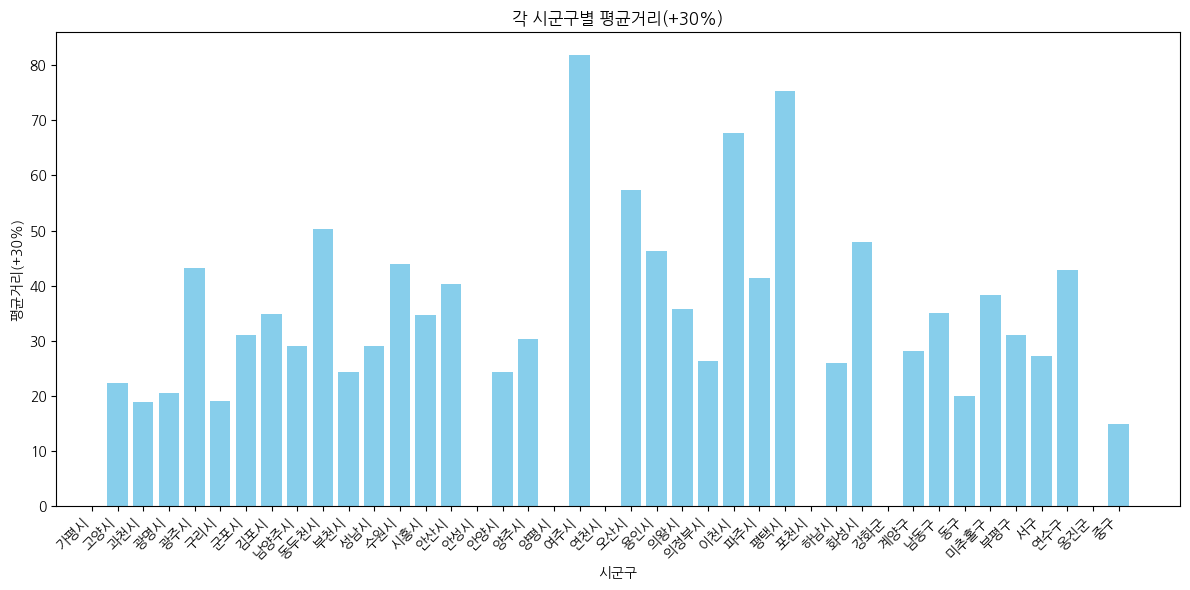

In [278]:
import koreanize_matplotlib

plt.figure(figsize=(12, 6))
plt.bar(df['시군구'], df['평균거리(+30%)'], color='skyblue')
plt.title('각 시군구별 평균거리(+30%)')
plt.xlabel('시군구')
plt.ylabel('평균거리(+30%)')
plt.xticks(rotation=45, ha='right')  # x축 레이블 회전
plt.tight_layout()
plt.show()

In [279]:
# AWS INSTANCE에서 데이터 가져오기
import mysql.connector

yespa_db = mysql.connector.connect(
    host = 'database-1.c3ieyo8m4v9o.ap-northeast-2.rds.amazonaws.com',
    port = 3306,
    user = 'eda_team',
    database = 'eda_project',
    password = '123456'
)

cur = yespa_db.cursor(buffered=True, dictionary=True)

cur.execute('SELECT * FROM metro_price_info')
result = cur.fetchall()

for data in result:
    print(data)
    
yespa_db.close()

{'거리': '10Km까지', '어른': 1400, '청소년': 800, '어린이': 500}
{'거리': '15Km까지', '어른': 1500, '청소년': 880, '어린이': 550}
{'거리': '20Km까지', '어른': 1600, '청소년': 960, '어린이': 600}
{'거리': '25Km까지', '어른': 1700, '청소년': 1040, '어린이': 660}
{'거리': '30Km까지', '어른': 1800, '청소년': 1120, '어린이': 700}
{'거리': '35Km까지', '어른': 1900, '청소년': 1200, '어린이': 750}
{'거리': '40Km까지', '어른': 2000, '청소년': 1280, '어린이': 800}
{'거리': '45Km까지', '어른': 2100, '청소년': 1360, '어린이': 850}
{'거리': '50Km까지', '어른': 2200, '청소년': 1440, '어린이': 900}
{'거리': '58Km까지', '어른': 2300, '청소년': 1520, '어린이': 950}
{'거리': '66Km까지', '어른': 2400, '청소년': 1600, '어린이': 1000}
{'거리': '74Km까지', '어른': 2500, '청소년': 1680, '어린이': 1050}
{'거리': '82Km까지', '어른': 2600, '청소년': 1760, '어린이': 1100}
{'거리': '90Km까지', '어른': 2700, '청소년': 1840, '어린이': 1150}
{'거리': '98Km까지', '어른': 2800, '청소년': 1920, '어린이': 1200}
{'거리': '106Km까지', '어른': 2900, '청소년': 2000, '어린이': 1250}
{'거리': '114Km까지', '어른': 3000, '청소년': 2080, '어린이': 1300}
{'거리': '122Km까지', '어른': 3100, '청소년': 2160, '어린이': 1350}
{'거리': '130Km까지', '어

In [280]:
df_pricetable = pd.DataFrame(result)
df_pricetable

,거리,어른,청소년,어린이
0,10Km까지,1400,800,500
1,15Km까지,1500,880,550
2,20Km까지,1600,960,600
3,25Km까지,1700,1040,660
4,30Km까지,1800,1120,700
5,35Km까지,1900,1200,750
6,40Km까지,2000,1280,800
7,45Km까지,2100,1360,850
8,50Km까지,2200,1440,900
9,58Km까지,2300,1520,950


In [281]:
def distance_to_price(distance):
    if distance <= 10:
        return 1400
    elif distance <= 15:
        return 1500
    elif distance <= 20:
        return 1600
    elif distance <= 25:
        return 1700
    elif distance <= 30:
        return 1800
    elif distance <= 35:
        return 1900
    elif distance <= 40:
        return 2000
    elif distance <= 45:
        return 2100
    elif distance <= 50:
        return 2200
    elif distance <= 58:
        return 2300
    elif distance <= 66:
        return 2400
    elif distance <= 74:
        return 2500
    elif distance <= 82:
        return 2600
    elif distance <= 90:
        return 2700
    elif distance <= 98:
        return 2800
    elif distance <= 106:
        return 2900
    elif distance <= 114:
        return 3000
    elif distance <= 122:
        return 3100
    elif distance <= 130:
        return 3200
    elif distance <= 138:
        return 3300
    elif distance <= 146:
        return 3400
    elif distance <= 154:
        return 3500
    elif distance <= 162:
        return 3600
    elif distance <= 170:
        return 3700
    elif distance <= 178:
        return 3800
    else:
        raise ValueError("잘못된 거리입니다.")

In [282]:
df.dropna(inplace=True)

In [283]:
df['운임가격'] = df['평균거리(+30%)'].apply(distance_to_price)
df

,시군구,평균거리(+30%),운임가격
1,고양시,22.370663,1700
2,과천시,18.764303,1600
3,광명시,20.464367,1700
4,광주시,43.168425,2100
5,구리시,19.090902,1600
6,군포시,31.040381,1900
7,김포시,34.893751,1900
8,남양주시,29.069331,1800
9,동두천시,50.284193,2300
10,부천시,24.344259,1700


In [284]:
df_sigungu=pd.read_csv('/home/jinsa/dev_ws/EDA_PROJECT/DATA/inout.csv')
df_sigungu =pd.pivot_table(df_sigungu, index="시군구",values=["오전유입량","오후유입량"],aggfunc='sum')
df_sigungu.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66 entries, 가평군 to 화성시
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   오전유입량   66 non-null     int64
 1   오후유입량   66 non-null     int64
dtypes: int64(2)
memory usage: 1.5+ KB


In [285]:
df_sigungu.reset_index(inplace=True)

In [286]:
df_sigungu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시군구     66 non-null     object
 1   오전유입량   66 non-null     int64 
 2   오후유입량   66 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.7+ KB


In [287]:
df_sigungu = df_sigungu[['시군구', '오전유입량', '오후유입량']]
df_sigungu[(df_sigungu['시군구'] == '고양시') | (df_sigungu['시군구'] == '용인시') | (df_sigungu['시군구'] == '부천시')]



,시군구,오전유입량,오후유입량
7,고양시,-107965944,93178522
29,부천시,-85852070,73043061
53,용인시,-92147747,76442559


In [288]:

df_sigungu['한달유입량']=(df_sigungu['오후유입량'] - df_sigungu['오전유입량'])/750000
df_sigungu['한달유입량'] = df_sigungu['한달유입량'].astype(float)
df_sigungu.sort_values('한달유입량', ascending=False,inplace=True)

df_sigungu = df_sigungu[['시군구', '한달유입량']]


df_sigungu

,시군구,한달유입량
9,관악구,299.871243
54,은평구,283.612317
7,고양시,268.192621
21,노원구,234.979247
53,용인시,224.787075
...,...,...
49,영등포구,-343.096671
33,서초구,-467.895865
58,종로구,-661.259287
59,중구,-876.137475


In [301]:
selected_df = df_sigungu[df_sigungu['시군구'].isin(df['시군구'])]

df_sigungu['한달유입량'] = df_sigungu['한달유입량'].astype(int)

merged_df = df_sigungu.merge(df, on='시군구', suffixes=('_sigungu', '_df'))

# '한달교통비' 열에 계산 결과 저장
merged_df['한달교통비'] = merged_df['한달유입량'] * merged_df['운임가격']

merged_df.sort_values('한달교통비', ascending=False, inplace=True)

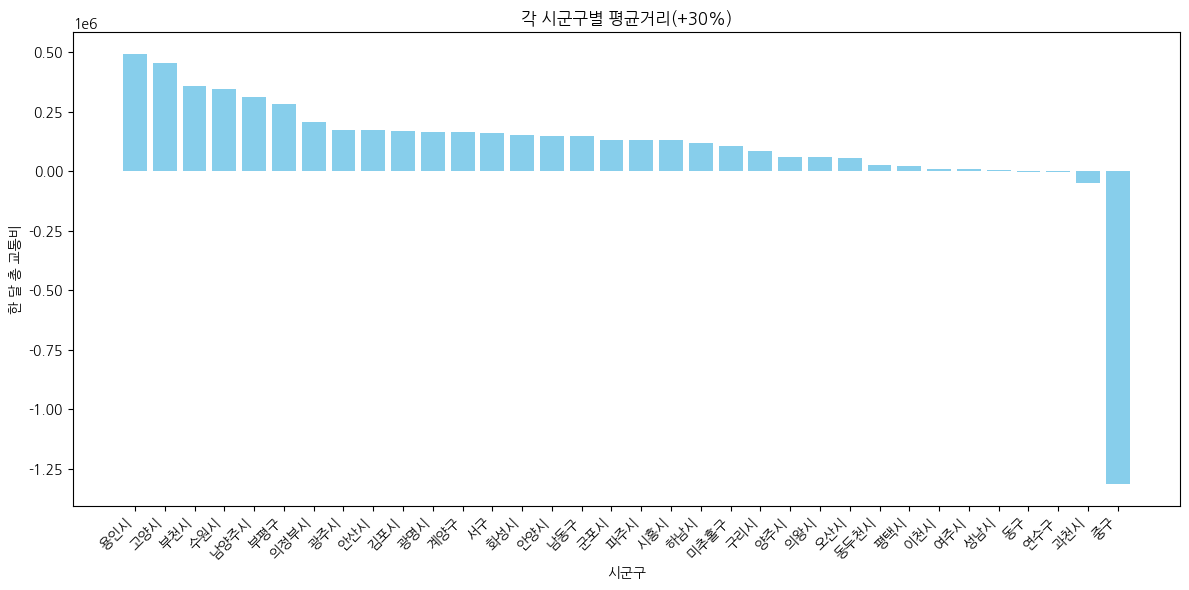

In [302]:


plt.figure(figsize=(12, 6))
plt.bar(merged_df['시군구'], merged_df['한달교통비'], color='skyblue')
plt.title('각 시군구별 평균거리(+30%)')
plt.xlabel('시군구')
plt.ylabel('한 달 총 교통비')
plt.xticks(rotation=45, ha='right')  # x축 레이블 회전
plt.tight_layout()
plt.show()